# 3.1 - Análise de Dados Ausentes

In [2]:
#Importando Pandas, OS para leitura do arquivo e Matplotlib

import pandas as pd
import os
import matplotlib.pyplot as plt

os.chdir('D:\\Users\\Diogo\\Documents\\Pós Graduação\\Módulos\\TCC\\DataSets\\Futebol Brasileiro')

#Importando o data set dos dados das partidas dos campeonatos brasileiros e os dados dos cartões amarelos

df_jogos=pd.read_csv('campeonato-brasileiro-full.csv',sep=',')
df_cartoes=pd.read_csv('df_cartoes.csv',sep=',')
df_faltas=pd.read_csv('df_faltas_tratados.csv',sep=',')

print(df_jogos.shape)
print(df_cartoes.shape)
print(df_jogos.shape)


(8025, 16)
(3358, 13)
(8025, 16)


In [3]:
#Importando o data set dos dados das partidas dos campeonatos brasileiros e os dados dos cartões amarelos

df_jogos=pd.read_csv('campeonato-brasileiro-full.csv',sep=',')
df_cartoes=pd.read_csv('df_cartoes.csv',sep=',')
df_faltas=pd.read_csv('df_faltas_tratados.csv',sep=',')



In [23]:
#Identificando a dimensão do DataFrame
df_jogos.shape

(8025, 16)

In [24]:
#Identificando a dimensão do DataFrame
df_cartoes.shape

(3358, 13)

In [25]:
#Identificando a dimensão do DataFrame
df_faltas.shape

(8025, 17)

# ANALISANDO O DATA FRAME DF_JOGOS

In [26]:
#Verificando as 5 primeiras linhas do DataFrame
df_jogos.head()

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/3/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/3/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/3/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR
3,4,1,30/3/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA
4,5,1,30/3/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP


In [4]:
#Inserindo a coluna campeonato
df_jogos_temp=df_jogos
df_jogos_temp['campeonato']=0

id_campeonato=0
alteracao=True
ano=0
for linha in range(len(df_jogos_temp)):

        #Coletando a rodada da partida
        rodada=df_jogos_temp.iloc[linha,1]
        
        data=df_jogos_temp.iloc[linha,2]
        data=data.split('/')
        ano_corrente=data[2]

        if(rodada==1 and ano!=ano_corrente): 
            id_campeonato=id_campeonato+1
            ano=ano_corrente
        df_jogos_temp['campeonato'].iloc[linha] = id_campeonato
        

df_jogos_temp

c:\users\diogo\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado,campeonato
0,1,1,29/3/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ,1
1,2,1,29/3/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS,1
2,3,1,30/3/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR,1
3,4,1,30/3/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA,1
4,5,1,30/3/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8020,8021,38,13/11/2022,16:03,Cuiaba,Coritiba,4-1-4-1,4-1-4-1,A. Cardoso de Oliveira,A. Ferreira,Cuiaba,Arena Pantanal,2,1,MT,PR,20
8021,8022,38,13/11/2022,16:03,Bragantino,Fluminense,4-2-3-1,4-2-3-1,M. Nogueira Barbieri,F. Diniz Silva,Fluminense,Nabizão,0,1,SP,RJ,20
8022,8023,38,13/11/2022,16:03,Corinthians,Atletico-MG,4-1-4-1,4-2-3-1,F. J. Monteiro Almeida,A. Stival,Atletico-MG,Neo Química Arena,0,1,SP,MG,20
8023,8024,38,13/11/2022,16:03,Internacional,Palmeiras,4-2-3-1,4-2-3-1,L. Venker de Menezes,A. Moreira Ferreira,Internacional,Estádio José Pinheiro Borda,3,0,RS,SP,20


In [5]:
#Ajustando o campeonato 18
df_jogos_temp['campeonato'].iloc[6885:7265]=18

c:\users\diogo\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [6]:
#Verificando os últimos registros do Dataframe
df_jogos_temp.tail()

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado,campeonato
8020,8021,38,13/11/2022,16:03,Cuiaba,Coritiba,4-1-4-1,4-1-4-1,A. Cardoso de Oliveira,A. Ferreira,Cuiaba,Arena Pantanal,2,1,MT,PR,20
8021,8022,38,13/11/2022,16:03,Bragantino,Fluminense,4-2-3-1,4-2-3-1,M. Nogueira Barbieri,F. Diniz Silva,Fluminense,Nabizão,0,1,SP,RJ,20
8022,8023,38,13/11/2022,16:03,Corinthians,Atletico-MG,4-1-4-1,4-2-3-1,F. J. Monteiro Almeida,A. Stival,Atletico-MG,Neo Química Arena,0,1,SP,MG,20
8023,8024,38,13/11/2022,16:03,Internacional,Palmeiras,4-2-3-1,4-2-3-1,L. Venker de Menezes,A. Moreira Ferreira,Internacional,Estádio José Pinheiro Borda,3,0,RS,SP,20
8024,8025,38,13/11/2022,16:03,Goias,Sao Paulo,4-2-3-1,4-1-2-1-2,J. Ribeiro Ventura,R. Ceni,Sao Paulo,Estádio da Serrinha,0,4,GO,SP,20


In [7]:
#Criando o Dataframe df_quantidade de jogos para posterior análise

df_quantidade_jogos = df_jogos['campeonato'].value_counts().reset_index().rename(columns={'campeonato': "total", "index":'campeonato'})
df_quantidade_jogos.sort_values(by='campeonato',ascending=True,inplace=True)
df_quantidade_jogos['total acumulado']=df_quantidade_jogos['total'].cumsum()
df_quantidade_jogos

,campeonato,total,total acumulado
0,1,552,552
1,2,552,1104
2,3,462,1566
18,4,380,1946
9,5,380,2326
13,6,380,2706
16,7,380,3086
5,8,380,3466
10,9,380,3846
14,10,380,4226


In [8]:
#Verificando o dataframe criado
df_quantidade_jogos['campeonato']=df_quantidade_jogos['campeonato'].astype(str)
df_quantidade_jogos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 8
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   campeonato       20 non-null     object
 1   total            20 non-null     int64 
 2   total acumulado  20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 640.0+ bytes


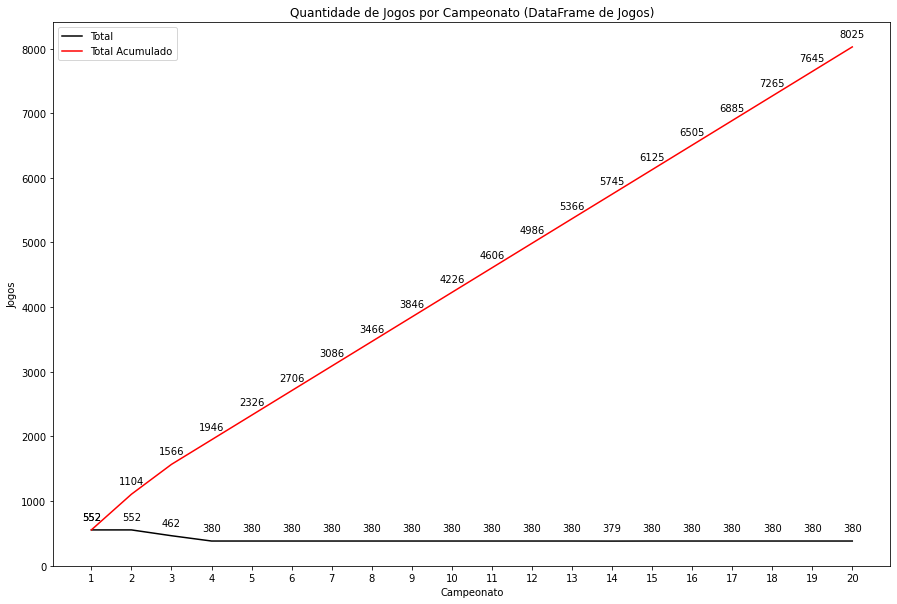

In [9]:
#Código para a construção do Gráfico

fig,ax=plt.subplots(figsize=(15,10))
ax.set(xlabel='Campeonato', ylabel='Jogos',
       title='Quantidade de Jogos por Campeonato (DataFrame de Jogos)')

plt.plot(df_quantidade_jogos['campeonato'],df_quantidade_jogos['total'],label="Total",color='black')

plt.plot(df_quantidade_jogos['campeonato'],df_quantidade_jogos['total acumulado'],label="Total Acumulado",color='red')

for x,y in zip(df_quantidade_jogos['campeonato'],df_quantidade_jogos['total']):

    label = "{:}".format(y)

    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,10),
                 ha='center') 


for x,y in zip(df_quantidade_jogos['campeonato'],df_quantidade_jogos['total acumulado']):

    label = "{:}".format(y)

    plt.annotate(label,
                 (x,y), 
                 textcoords="offset points",
                 xytext=(0,10), 
                 ha='center')

plt.legend()
plt.show()

 # ANALISANDO O DATA FRAME DF_CARTOES

In [10]:
#Criando um Data Frame com as informações do campeonato para realizar o merge no data frame de cartoes
df_jogos_merge = df_jogos[['ID','data','campeonato']]
df_jogos_merge.head()

,ID,data,campeonato
0,1,29/3/2003,1
1,2,29/3/2003,1
2,3,30/3/2003,1
3,4,30/3/2003,1
4,5,30/3/2003,1


In [11]:
#Executando a mescla dos Data Frames
df_cartoes_merge=df_cartoes.merge(df_jogos_merge,on='ID',how='left')
df_cartoes_merge.head()

,Unnamed: 0,ID,clube_mandante,qtd_cartao_amarelo_mandante,qtd_cartao_vermelho_mandante,clube_visitante,qtd_cartao_amarelo_visitante,qtd_cartao_vermelho_visitante,total_cartoes_mandante,total_cartoes_visitante,total_cartoes_amarelos,total_cartoes_vermelhos,total_cartoes_partida,data,campeonato
0,0,4607,Fluminense,0,0,Figueirense,2,0,0,2,2,0,2,19/4/2014,12
1,1,4608,Internacional,2,0,Vitoria,3,0,2,3,5,0,5,19/4/2014,12
2,2,4609,Chapecoense,0,0,Coritiba,1,0,0,1,1,0,1,19/4/2014,12
3,3,4610,Athletico-PR,1,0,Gremio,2,0,1,2,3,0,3,20/4/2014,12
4,4,4611,Sao Paulo,1,0,Botafogo-RJ,2,0,1,2,3,0,3,20/4/2014,12


In [12]:
#Conferindo as quantidades dos Data Frames de Cartões para verificar se houve problema no merge
df_cartoes_merge.shape

(3358, 15)

In [13]:
#Verificando as dimensões do DataFrame
df_cartoes.shape

(3358, 13)

In [14]:
#Verificando as colunas e registros do Dataframe
df_cartoes_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3358 entries, 0 to 3357
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     3358 non-null   int64 
 1   ID                             3358 non-null   int64 
 2   clube_mandante                 3358 non-null   object
 3   qtd_cartao_amarelo_mandante    3358 non-null   int64 
 4   qtd_cartao_vermelho_mandante   3358 non-null   int64 
 5   clube_visitante                3358 non-null   object
 6   qtd_cartao_amarelo_visitante   3358 non-null   int64 
 7   qtd_cartao_vermelho_visitante  3358 non-null   int64 
 8   total_cartoes_mandante         3358 non-null   int64 
 9   total_cartoes_visitante        3358 non-null   int64 
 10  total_cartoes_amarelos         3358 non-null   int64 
 11  total_cartoes_vermelhos        3358 non-null   int64 
 12  total_cartoes_partida          3358 non-null   int64 
 13  dat

In [15]:
#Criando o Dataframe df_qtd_jogos_cartoes
df_qtd_jogos_cartoes = df_cartoes_merge['campeonato'].value_counts().reset_index().rename(columns={'campeonato': "total", "index":'campeonato'})
df_qtd_jogos_cartoes.sort_values(by='campeonato',ascending=True,inplace=True)
df_qtd_jogos_cartoes['total acumulado']=df_qtd_jogos_cartoes['total'].cumsum()
df_qtd_jogos_cartoes

,campeonato,total,total acumulado
8,12,371,371
3,13,373,744
7,14,372,1116
2,15,374,1490
0,16,377,1867
5,17,372,2239
6,18,372,2611
1,19,374,2985
4,20,373,3358


In [16]:
#Verificando as colunas do Dataframe criado
df_qtd_jogos_cartoes['campeonato']=df_qtd_jogos_cartoes['campeonato'].astype(str)
df_qtd_jogos_cartoes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 8 to 4
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   campeonato       9 non-null      object
 1   total            9 non-null      int64 
 2   total acumulado  9 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 288.0+ bytes


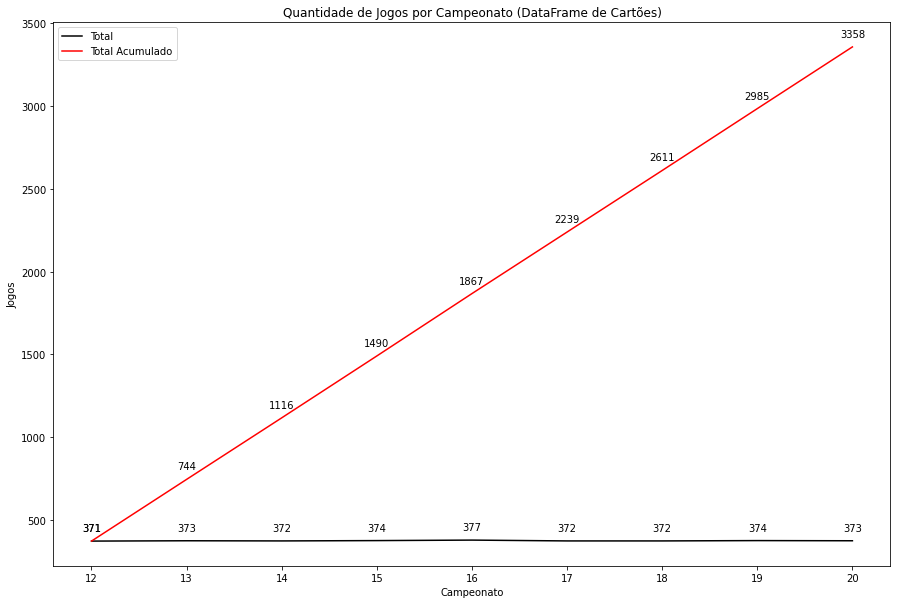

In [17]:
#Código para a construção do gráfico

fig,ax=plt.subplots(figsize=(15,10))
ax.set(xlabel='Campeonato', ylabel='Jogos',
       title='Quantidade de Jogos por Campeonato (DataFrame de Cartões)')

plt.plot(df_qtd_jogos_cartoes['campeonato'],df_qtd_jogos_cartoes['total'],label="Total",color='black')

plt.plot(df_qtd_jogos_cartoes['campeonato'],df_qtd_jogos_cartoes['total acumulado'],label="Total Acumulado",color='red')

for x,y in zip(df_qtd_jogos_cartoes['campeonato'],df_qtd_jogos_cartoes['total']):

    label = "{:}".format(y)

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')


for x,y in zip(df_qtd_jogos_cartoes['campeonato'],df_qtd_jogos_cartoes['total acumulado']):

    label = "{:}".format(y)

    plt.annotate(label,
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center') 

plt.legend()
plt.show()

# ANALISANDO O DATA FRAME DF_FALTAS

In [34]:
#Verificando as colunas e registros do Dataframe df_faltas
df_faltas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8025 entries, 0 to 8024
Data columns (total 17 columns):
Unnamed: 0                   8025 non-null int64
partida_id                   8025 non-null int64
clube_mandante               8025 non-null object
cartao_amarelo_mandante      8025 non-null int64
cartao_vermelho_mandante     8025 non-null int64
passes_mandante              8025 non-null int64
faltas_mandante              8025 non-null int64
clube_visitante              8025 non-null object
cartao_amarelo_visitante     8025 non-null int64
cartao_vermelho_visitante    8025 non-null int64
passes_visitante             8025 non-null int64
faltas_visitante             8025 non-null int64
total_faltas_partida         8025 non-null int64
total_passes_partida         8025 non-null int64
total_cartoes_amarelos       8025 non-null int64
total_cartoes_vermelhos      8025 non-null int64
total_cartoes_partida        8025 non-null int64
dtypes: int64(15), object(2)
memory usage: 1.0+ MB


In [35]:
df_faltas.head()

,Unnamed: 0,partida_id,clube_mandante,cartao_amarelo_mandante,cartao_vermelho_mandante,passes_mandante,faltas_mandante,clube_visitante,cartao_amarelo_visitante,cartao_vermelho_visitante,passes_visitante,faltas_visitante,total_faltas_partida,total_passes_partida,total_cartoes_amarelos,total_cartoes_vermelhos,total_cartoes_partida
0,0,1,Guarani,0,0,0,0,Vasco,0,0,0,0,0,0,0,0,0
1,1,2,Athletico-PR,0,0,0,0,Gremio,0,0,0,0,0,0,0,0,0
2,2,3,Flamengo,0,0,0,0,Coritiba,0,0,0,0,0,0,0,0,0
3,3,4,Goias,0,0,0,0,Paysandu,0,0,0,0,0,0,0,0,0
4,4,5,Internacional,0,0,0,0,Ponte Preta,0,0,0,0,0,0,0,0,0


In [36]:
#Alterando o nome da coluna partida_id para ID do DataFrame de cartões para que fique com o mesmo nome do DataFrame de 
# Jogos
df_faltas.rename(columns={'partida_id':'ID'},inplace=True)
df_faltas.head()

,Unnamed: 0,ID,clube_mandante,cartao_amarelo_mandante,cartao_vermelho_mandante,passes_mandante,faltas_mandante,clube_visitante,cartao_amarelo_visitante,cartao_vermelho_visitante,passes_visitante,faltas_visitante,total_faltas_partida,total_passes_partida,total_cartoes_amarelos,total_cartoes_vermelhos,total_cartoes_partida
0,0,1,Guarani,0,0,0,0,Vasco,0,0,0,0,0,0,0,0,0
1,1,2,Athletico-PR,0,0,0,0,Gremio,0,0,0,0,0,0,0,0,0
2,2,3,Flamengo,0,0,0,0,Coritiba,0,0,0,0,0,0,0,0,0
3,3,4,Goias,0,0,0,0,Paysandu,0,0,0,0,0,0,0,0,0
4,4,5,Internacional,0,0,0,0,Ponte Preta,0,0,0,0,0,0,0,0,0


In [37]:
#Executando a mescla dos Data Frames de faltas com os dados do data frame de jogos
df_faltas_merge=df_faltas.merge(df_jogos_merge,on='ID',how='left')
df_faltas_merge.head()

,Unnamed: 0,ID,clube_mandante,cartao_amarelo_mandante,cartao_vermelho_mandante,passes_mandante,faltas_mandante,clube_visitante,cartao_amarelo_visitante,cartao_vermelho_visitante,passes_visitante,faltas_visitante,total_faltas_partida,total_passes_partida,total_cartoes_amarelos,total_cartoes_vermelhos,total_cartoes_partida,data,campeonato
0,0,1,Guarani,0,0,0,0,Vasco,0,0,0,0,0,0,0,0,0,29/3/2003,1
1,1,2,Athletico-PR,0,0,0,0,Gremio,0,0,0,0,0,0,0,0,0,29/3/2003,1
2,2,3,Flamengo,0,0,0,0,Coritiba,0,0,0,0,0,0,0,0,0,30/3/2003,1
3,3,4,Goias,0,0,0,0,Paysandu,0,0,0,0,0,0,0,0,0,30/3/2003,1
4,4,5,Internacional,0,0,0,0,Ponte Preta,0,0,0,0,0,0,0,0,0,30/3/2003,1


In [38]:
#Verificando a dimensão do Dataframe
df_faltas.shape

(8025, 17)

In [39]:
#Verificando a dimensão do Dataframe
df_faltas_merge.shape

(8025, 19)

In [40]:
#Criando o Dataframe df_qtd_jogos_faltas
df_qtd_jogos_faltas = df_faltas_merge['campeonato'].value_counts().reset_index().rename(columns={'campeonato': "total", "index":'campeonato'})
df_qtd_jogos_faltas.sort_values(by='campeonato',ascending=True,inplace=True)
df_qtd_jogos_faltas['total acumulado']=df_qtd_jogos_faltas['total'].cumsum()
df_qtd_jogos_faltas.head()

,campeonato,total,total acumulado
0,1,552,552
1,2,552,1104
2,3,462,1566
18,4,380,1946
9,5,380,2326


In [41]:
#Verificando as colunas e informações do dataframe
df_qtd_jogos_faltas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 8
Data columns (total 3 columns):
campeonato         20 non-null int64
total              20 non-null int64
total acumulado    20 non-null int64
dtypes: int64(3)
memory usage: 640.0 bytes


In [42]:
#Convertendo a coluna "campeonato" para string
df_qtd_jogos_faltas['campeonato']=df_qtd_jogos_faltas['campeonato'].astype(str)
df_qtd_jogos_faltas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 8
Data columns (total 3 columns):
campeonato         20 non-null object
total              20 non-null int64
total acumulado    20 non-null int64
dtypes: int64(2), object(1)
memory usage: 640.0+ bytes


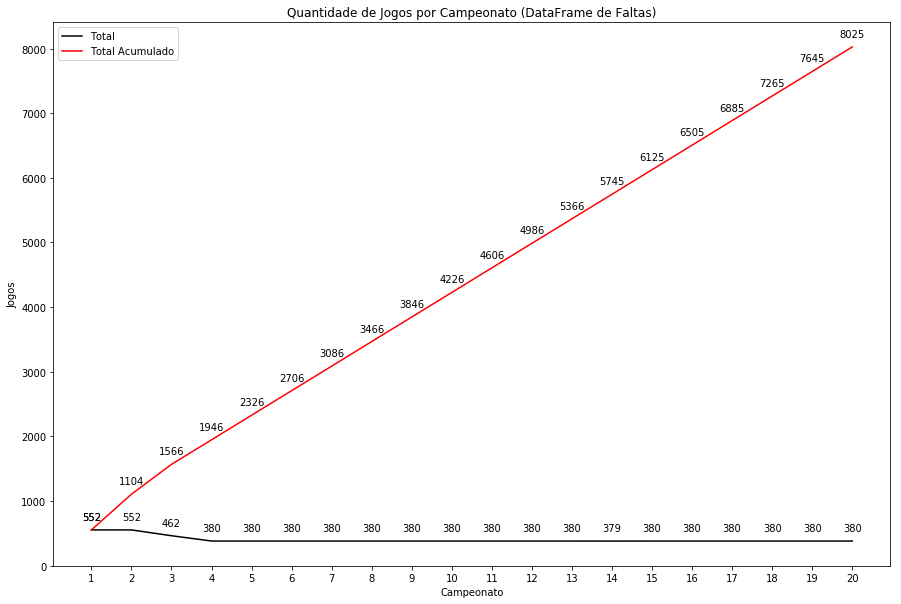

In [43]:
#Código para a construção do gráfico

fig,ax=plt.subplots(figsize=(15,10))
ax.set(xlabel='Campeonato', ylabel='Jogos',
       title='Quantidade de Jogos por Campeonato (DataFrame de Faltas)')

plt.plot(df_qtd_jogos_faltas['campeonato'],df_qtd_jogos_faltas['total'],label="Total",color='black')

plt.plot(df_qtd_jogos_faltas['campeonato'],df_qtd_jogos_faltas['total acumulado'],label="Total Acumulado",color='red')

for x,y in zip(df_qtd_jogos_faltas['campeonato'],df_qtd_jogos_faltas['total']):

    label = "{:}".format(y)

    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center') 


for x,y in zip(df_qtd_jogos_faltas['campeonato'],df_qtd_jogos_faltas['total acumulado']):

    label = "{:}".format(y)

    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center') 

plt.legend()
plt.show()

In [44]:
#Observamos no início da análise que o data frame de faltas possuia as linhas com os registros das partidas, porém, muitas delas
#com os valores zerados, portanto, iremos analisar a partir de quando esses dados de fato possuem valor para o trabalho.

#Vamos utilizar a coluna de passes_mandante para verificar a partir de quando os dados estão de fato inputados. Escolhi esta
# pois é impossível uma partida de futebol ocorrer sem a execução de passes.

df_grafico_passes=df_faltas_merge[['campeonato','passes_mandante']].groupby(['campeonato']).sum().reset_index()

In [45]:
#Alterando a coluna "campeonato" para string
df_grafico_passes['campeonato']=df_grafico_passes['campeonato'].astype(str)

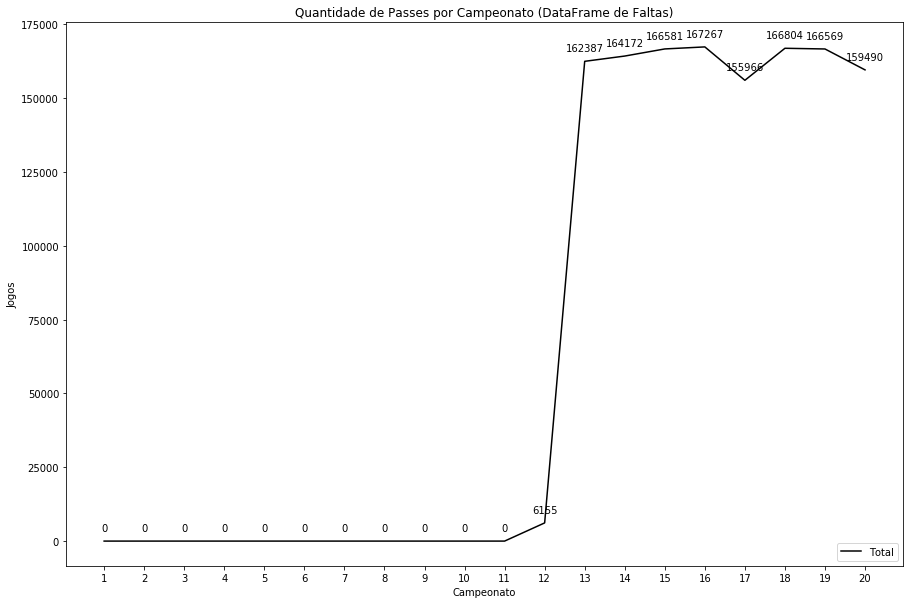

In [46]:
#Código para a construção do gráfico

fig,ax=plt.subplots(figsize=(15,10))
ax.set(xlabel='Campeonato', ylabel='Jogos',
       title='Quantidade de Passes por Campeonato (DataFrame de Faltas)')

plt.plot(df_grafico_passes['campeonato'],df_grafico_passes['passes_mandante'],label="Total",color='black')

for x,y in zip(df_grafico_passes['campeonato'],df_grafico_passes['passes_mandante']):

    label = "{:}".format(y)

    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,10),
                 ha='center')


plt.legend(loc='lower right')
plt.show()

In [47]:
#Criação do Dataframe df_campeonato12
df_campeonato12 = df_faltas_merge[df_faltas_merge.campeonato==12]
df_campeonato12.head()

,Unnamed: 0,ID,clube_mandante,cartao_amarelo_mandante,cartao_vermelho_mandante,passes_mandante,faltas_mandante,clube_visitante,cartao_amarelo_visitante,cartao_vermelho_visitante,passes_visitante,faltas_visitante,total_faltas_partida,total_passes_partida,total_cartoes_amarelos,total_cartoes_vermelhos,total_cartoes_partida,data,campeonato
4606,4606,4607,Fluminense,0,0,0,0,Figueirense,0,0,0,0,0,0,0,0,0,19/4/2014,12
4607,4607,4608,Internacional,0,0,0,0,Vitoria,0,0,0,0,0,0,0,0,0,19/4/2014,12
4608,4608,4609,Chapecoense,0,0,0,0,Coritiba,0,0,0,0,0,0,0,0,0,19/4/2014,12
4609,4609,4610,Athletico-PR,0,0,0,0,Gremio,0,0,0,0,0,0,0,0,0,20/4/2014,12
4610,4610,4611,Sao Paulo,0,0,0,0,Botafogo-RJ,0,0,0,0,0,0,0,0,0,20/4/2014,12


In [48]:
#Identificando os registros do campeonato com valores diferentes de 0
df_campeonato12_validos=df_campeonato12[df_campeonato12.passes_mandante != 0]

In [49]:
#Verificando as dimensões do Dataframe
df_campeonato12_validos.shape

(16, 19)

In [50]:
#Verificando as dimensões do Dataframe
df_campeonato12.shape

(380, 19)

In [54]:
#Como identificamos anteriormente os dados relevantes no Data Frame de faltas se iniciam a partir do campeonato 13. Até o 
#campeonato 11 não temos praticamente os dados e no campeonato 12 temos os dados parciais. Portanto, iremos equalizar os dados
# de todos os Data Frames a partir desse recorte.

df_faltas_merge=df_faltas_merge[df_faltas_merge.campeonato>12]
df_faltas_merge.head()

,Unnamed: 0,ID,clube_mandante,cartao_amarelo_mandante,cartao_vermelho_mandante,passes_mandante,faltas_mandante,clube_visitante,cartao_amarelo_visitante,cartao_vermelho_visitante,passes_visitante,faltas_visitante,total_faltas_partida,total_passes_partida,total_cartoes_amarelos,total_cartoes_vermelhos,total_cartoes_partida,data,campeonato
4986,4986,4987,Chapecoense,2,0,326,20,Coritiba,2,0,388,21,41,714,4,0,4,9/5/2015,13
4987,4987,4988,Palmeiras,2,0,406,20,Atletico-MG,4,0,426,14,34,832,6,0,6,9/5/2015,13
4988,4988,4989,Fluminense,2,0,702,9,Joinville,0,1,250,14,23,952,2,1,3,9/5/2015,13
4989,4989,4990,Gremio,3,0,401,17,Ponte Preta,4,1,473,21,38,874,7,1,8,10/5/2015,13
4990,4990,4991,Athletico-PR,1,0,335,17,Internacional,2,0,502,17,34,837,3,0,3,10/5/2015,13


In [55]:
#Verificando as dimensões do Dataframe
df_faltas_merge.shape

(3039, 19)

In [56]:
#Salvando o Dataframe em um diretório local
df_faltas_merge.to_csv('D:\\Users\\Diogo\\Documents\\Pós Graduação\\Módulos\\TCC\\DataSets\\Futebol Brasileiro\\df_faltas.csv')

# ANALISANDO OS 3 DATAFRAMES EM CONJUNTO

NameError: name 'df_qtd_jogos_cartoes' is not defined

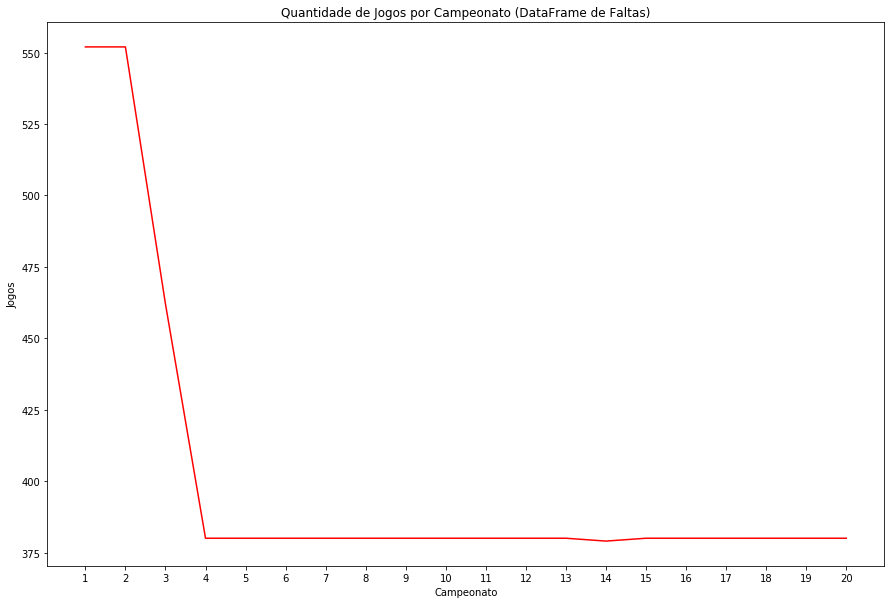

In [53]:
#Código que executa a construção do gráfico

fig,ax=plt.subplots(figsize=(15,10))
ax.set(xlabel='Campeonato', ylabel='Jogos',
       title='Quantidade de Jogos por Campeonato (DataFrame de Faltas)')

plt.plot(df_quantidade_jogos['campeonato'],df_quantidade_jogos['total'],label="Data Frame Jogos",color='red')


plt.plot(df_qtd_jogos_cartoes['campeonato'],df_qtd_jogos_cartoes['total'],label="Data Frame Cartões",color='yellow')


plt.plot(df_qtd_jogos_faltas['campeonato'],df_qtd_jogos_faltas['total'],label="Data Frame Faltas",color='blue')


for x,y in zip(df_quantidade_jogos['campeonato'],df_quantidade_jogos['total']):

    label = "{:}".format(y)

    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center') 



for x,y in zip(df_qtd_jogos_cartoes['campeonato'],df_qtd_jogos_cartoes['total']):

    label = "{:}".format(y)

    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')


for x,y in zip(df_qtd_jogos_faltas['campeonato'],df_qtd_jogos_faltas['total acumulado']):

    label = "{:}".format(y)

    plt.annotate(label,
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center') 

plt.legend()
plt.show()

In [40]:
#CONCLUSÃO: A hipótese para a diferença de valores trata-se das partidas em que não houveram cartões. Serão pesquisadas
# essas partidas para a verificação desta hipótese e possível correção desses dados.

# VERIFICANDO OS IDS AUSENTES NO DATA FRAME DE CARTÕES

In [41]:
#Excluindo os jogos do data frame jogos campeonato 1 ao campeonato 11
df_jogos_tratados=df_jogos[df_jogos.ID>4606]

In [42]:
#Verificando os dados do dataframe
df_cartoes_merge.head()

,Unnamed: 0,ID,clube_mandante,qtd_cartao_amarelo_mandante,qtd_cartao_vermelho_mandante,clube_visitante,qtd_cartao_amarelo_visitante,qtd_cartao_vermelho_visitante,total_cartoes_mandante,total_cartoes_visitante,total_cartoes_amarelos,total_cartoes_vermelhos,total_cartoes_partida,data,campeonato
0,0,4607,Fluminense,0,0,Figueirense,2,0,0,2,2,0,2,19/4/2014,12
1,1,4608,Internacional,2,0,Vitoria,3,0,2,3,5,0,5,19/4/2014,12
2,2,4609,Chapecoense,0,0,Coritiba,1,0,0,1,1,0,1,19/4/2014,12
3,3,4610,Athletico-PR,1,0,Gremio,2,0,1,2,3,0,3,20/4/2014,12
4,4,4611,Sao Paulo,1,0,Botafogo-RJ,2,0,1,2,3,0,3,20/4/2014,12


In [43]:
#criando o Dataframe df_cartoes_ids_ausentes com a verificação dos dados do Dataframe df_jogos_tratados
df_cartoes_ids_ausentes = df_jogos_tratados[~df_jogos_tratados['ID'].isin(df_cartoes_merge['ID'])]
df_cartoes_ids_ausentes = df_cartoes_ids_ausentes[['ID','campeonato','data','mandante','visitante']]  
df_cartoes_ids_ausentes.head()

,ID,campeonato,data,mandante,visitante
4612,4613,12,20/4/2014,Atletico-MG,Corinthians
4652,4653,12,18/5/2014,Vitoria,Palmeiras
4657,4659,12,21/5/2014,Cruzeiro,Sport
4679,4681,12,28/5/2014,Goias,Vitoria
4727,4739,12,2/8/2014,Vitoria,Gremio


In [44]:
#Salvando o Dataframe em um diretório local
df_cartoes_ids_ausentes.to_csv('D:\\Users\\Diogo\\Documents\\Pós Graduação\\Módulos\\TCC\\DataSets\\Futebol Brasileiro\\df_cartoes_ids_ausentes.csv')

In [45]:
#Conferindo uma partida
df_cartoes_ids_ausentes[df_cartoes_ids_ausentes.ID==7401]

,ID,campeonato,data,mandante,visitante
7397,7401,19,1/8/2021,Chapecoense,Santos


In [46]:
#Carregando o arquivo de cartões
df_cartoes_antigo=pd.read_csv('campeonato-brasileiro-cartoes.csv',sep=',')
df_cartoes_antigo[df_cartoes_antigo.partida_id==7401]


,partida_id,rodata,clube,cartao,atleta,num_camisa,posicao,minuto


In [3]:
#Carregando o data frame com os dados conferidos
df_cartoes_zerados=pd.read_csv('df_cartoes_zerados.csv',sep=';')
df_cartoes_zerados.head()

,ID,campeonato,data,mandante,visitante,cartao_amarelo_mandante,cartao_amarelo_visitante,cartao_vermelho_mandante,cartao_vermelho_visitante
0,4613,12,20/4/2014,Atletico-MG,Corinthians,0,0,0,0
1,4653,12,18/5/2014,Vitoria,Palmeiras,0,0,0,0
2,4659,12,21/5/2014,Cruzeiro,Sport,0,0,0,0
3,4681,12,28/5/2014,Goias,Vitoria,0,0,0,0
4,4739,12,2/8/2014,Vitoria,Gremio,0,0,0,0


In [7]:
print('Contagem Cartões Amarelos Mandantes')
df_cartoes_zerados['cartao_amarelo_mandante'].value_counts()

Contagem Cartões Amarelos Mandantes


0    60
2     1
Name: cartao_amarelo_mandante, dtype: int64

In [8]:
print('Contagem Cartões Amarelos Visitantes')
df_cartoes_zerados['cartao_amarelo_visitante'].value_counts()

Contagem Cartões Amarelos Visitantes


0    60
1     1
Name: cartao_amarelo_visitante, dtype: int64

In [9]:
print('Contagem Cartões Vermelho Mandantes')
df_cartoes_zerados['cartao_vermelho_mandante'].value_counts()

Contagem Cartões Vermelho Mandantes


0    60
2     1
Name: cartao_vermelho_mandante, dtype: int64

In [10]:
print('Contagem Cartões Vermelho Visitantes')
df_cartoes_zerados['cartao_vermelho_visitante'].value_counts()

Contagem Cartões Vermelho Visitantes


0    61
Name: cartao_vermelho_visitante, dtype: int64

In [48]:
#Verificando os dados do dataframe
df_cartoes_merge.head()

,Unnamed: 0,ID,clube_mandante,qtd_cartao_amarelo_mandante,qtd_cartao_vermelho_mandante,clube_visitante,qtd_cartao_amarelo_visitante,qtd_cartao_vermelho_visitante,total_cartoes_mandante,total_cartoes_visitante,total_cartoes_amarelos,total_cartoes_vermelhos,total_cartoes_partida,data,campeonato
0,0,4607,Fluminense,0,0,Figueirense,2,0,0,2,2,0,2,19/4/2014,12
1,1,4608,Internacional,2,0,Vitoria,3,0,2,3,5,0,5,19/4/2014,12
2,2,4609,Chapecoense,0,0,Coritiba,1,0,0,1,1,0,1,19/4/2014,12
3,3,4610,Athletico-PR,1,0,Gremio,2,0,1,2,3,0,3,20/4/2014,12
4,4,4611,Sao Paulo,1,0,Botafogo-RJ,2,0,1,2,3,0,3,20/4/2014,12


In [49]:
#Reordenando e selecionando as colunas do dataframe
df_cartoes_zerados=df_cartoes_zerados[['ID','campeonato','data','mandante','cartao_amarelo_mandante','cartao_vermelho_mandante',
                                      'visitante','cartao_amarelo_visitante','cartao_vermelho_visitante']]
df_cartoes_zerados.head()

,ID,campeonato,data,mandante,cartao_amarelo_mandante,cartao_vermelho_mandante,visitante,cartao_amarelo_visitante,cartao_vermelho_visitante
0,4613,12,20/4/2014,Atletico-MG,0,0,Corinthians,0,0
1,4653,12,18/5/2014,Vitoria,0,0,Palmeiras,0,0
2,4659,12,21/5/2014,Cruzeiro,0,0,Sport,0,0
3,4681,12,28/5/2014,Goias,0,0,Vitoria,0,0
4,4739,12,2/8/2014,Vitoria,0,0,Gremio,0,0


In [50]:
#Calculando as colunas de totais

df_cartoes_zerados['total_cartoes_mandante']=df_cartoes_zerados[['cartao_amarelo_mandante','cartao_vermelho_mandante']].sum(axis=1)
df_cartoes_zerados['total_cartoes_visitante']=df_cartoes_zerados[['cartao_amarelo_visitante','cartao_vermelho_visitante']].sum(axis=1)
df_cartoes_zerados['total_cartoes_amarelos']=df_cartoes_zerados[['cartao_amarelo_mandante','cartao_amarelo_visitante']].sum(axis=1)
df_cartoes_zerados['total_cartoes_vermelhos']=df_cartoes_zerados[['cartao_vermelho_mandante','cartao_vermelho_visitante']].sum(axis=1)
df_cartoes_zerados['total_cartoes_partida']=df_cartoes_zerados[['total_cartoes_mandante','total_cartoes_visitante']].sum(axis=1)


df_cartoes_zerados[df_cartoes_zerados.ID==7401]

,ID,campeonato,data,mandante,cartao_amarelo_mandante,cartao_vermelho_mandante,visitante,cartao_amarelo_visitante,cartao_vermelho_visitante,total_cartoes_mandante,total_cartoes_visitante,total_cartoes_amarelos,total_cartoes_vermelhos,total_cartoes_partida
49,7401,19,1/8/2021,Chapecoense,2,2,Santos,1,0,4,1,3,2,5


In [51]:
#Reordenando as colunas

df_cartoes_zerados = df_cartoes_zerados[['ID','mandante','cartao_amarelo_mandante','cartao_vermelho_mandante',
'visitante','cartao_amarelo_visitante','cartao_vermelho_visitante','total_cartoes_mandante','total_cartoes_visitante',
                                        'total_cartoes_amarelos','total_cartoes_vermelhos','total_cartoes_partida','data','campeonato']]

df_cartoes_zerados.head()

,ID,mandante,cartao_amarelo_mandante,cartao_vermelho_mandante,visitante,cartao_amarelo_visitante,cartao_vermelho_visitante,total_cartoes_mandante,total_cartoes_visitante,total_cartoes_amarelos,total_cartoes_vermelhos,total_cartoes_partida,data,campeonato
0,4613,Atletico-MG,0,0,Corinthians,0,0,0,0,0,0,0,20/4/2014,12
1,4653,Vitoria,0,0,Palmeiras,0,0,0,0,0,0,0,18/5/2014,12
2,4659,Cruzeiro,0,0,Sport,0,0,0,0,0,0,0,21/5/2014,12
3,4681,Goias,0,0,Vitoria,0,0,0,0,0,0,0,28/5/2014,12
4,4739,Vitoria,0,0,Gremio,0,0,0,0,0,0,0,2/8/2014,12


In [52]:
#Verificando as colunas dos cartões
df_cartoes_zerados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 14 columns):
ID                           61 non-null int64
mandante                     61 non-null object
cartao_amarelo_mandante      61 non-null int64
cartao_vermelho_mandante     61 non-null int64
visitante                    61 non-null object
cartao_amarelo_visitante     61 non-null int64
cartao_vermelho_visitante    61 non-null int64
total_cartoes_mandante       61 non-null int64
total_cartoes_visitante      61 non-null int64
total_cartoes_amarelos       61 non-null int64
total_cartoes_vermelhos      61 non-null int64
total_cartoes_partida        61 non-null int64
data                         61 non-null object
campeonato                   61 non-null int64
dtypes: int64(11), object(3)
memory usage: 6.8+ KB


In [53]:
#Renomeando as colunas para os nomes do data frame de cartões

df_cartoes_zerados.rename(columns={'mandante':'clube_mandante'},inplace=True)
df_cartoes_zerados.rename(columns={'cartao_amarelo_mandante':'qtd_cartao_amarelo_mandante'},inplace=True)
df_cartoes_zerados.rename(columns={'cartao_vermelho_mandante':'qtd_cartao_vermelho_mandante'},inplace=True)
df_cartoes_zerados.rename(columns={'visitante':'clube_visitante'},inplace=True)
df_cartoes_zerados.rename(columns={'cartao_amarelo_visitante':'qtd_cartao_amarelo_visitante'},inplace=True)
df_cartoes_zerados.rename(columns={'cartao_vermelho_visitante':'qtd_cartao_vermelho_visitante'},inplace=True)
df_cartoes_zerados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 14 columns):
ID                               61 non-null int64
clube_mandante                   61 non-null object
qtd_cartao_amarelo_mandante      61 non-null int64
qtd_cartao_vermelho_mandante     61 non-null int64
clube_visitante                  61 non-null object
qtd_cartao_amarelo_visitante     61 non-null int64
qtd_cartao_vermelho_visitante    61 non-null int64
total_cartoes_mandante           61 non-null int64
total_cartoes_visitante          61 non-null int64
total_cartoes_amarelos           61 non-null int64
total_cartoes_vermelhos          61 non-null int64
total_cartoes_partida            61 non-null int64
data                             61 non-null object
campeonato                       61 non-null int64
dtypes: int64(11), object(3)
memory usage: 6.8+ KB


In [54]:
#Executando a mescla dos cartões tratados com os cartões corrigidos
df_cartoes_tratados = df_cartoes_merge.append(df_cartoes_zerados,ignore_index=True)
df_cartoes_tratados.tail(100)

C:\Users\Diogo\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,ID,Unnamed: 0,campeonato,clube_mandante,clube_visitante,data,qtd_cartao_amarelo_mandante,qtd_cartao_amarelo_visitante,qtd_cartao_vermelho_mandante,qtd_cartao_vermelho_visitante,total_cartoes_amarelos,total_cartoes_mandante,total_cartoes_partida,total_cartoes_vermelhos,total_cartoes_visitante
3319,7986,3319.0,20,Ceara,Fluminense,31/10/2022,2,2,1,0,4,3,5,1,2
3320,7987,3320.0,20,Botafogo-RJ,Cuiaba,1/11/2022,1,1,0,0,2,1,2,0,1
3321,7988,3321.0,20,Sao Paulo,Atletico-MG,1/11/2022,3,5,0,0,8,3,8,0,5
3322,7989,3322.0,20,Athletico-PR,Goias,2/11/2022,2,1,0,0,3,2,3,0,1
3323,7991,3323.0,20,Juventude,Coritiba,2/11/2022,3,4,0,0,7,3,7,0,4
3324,7992,3324.0,20,Avai,Bragantino,2/11/2022,2,1,0,0,3,2,3,0,1
3325,7993,3325.0,20,Atletico-GO,Santos,2/11/2022,3,2,0,0,5,3,5,0,2
3326,7994,3326.0,20,Palmeiras,Fortaleza,2/11/2022,3,1,0,0,4,3,4,0,1
3327,7995,3327.0,20,Flamengo,Corinthians,2/11/2022,0,1,0,0,1,0,1,0,1
3328,7996,3328.0,20,Santos,Avai,5/11/2022,3,0,0,0,3,3,3,0,0


In [63]:
#Verificando a dimensão do Dataframe
df_cartoes_tratados.shape

(3419, 15)

In [57]:
#Verificando a dimensão do Dataframe
df_cartoes_merge.shape

(3358, 15)

In [56]:
#Salvando o dataframe em diretório local
df_cartoes_tratados.to_csv('D:\\Users\\Diogo\\Documents\\Pós Graduação\\Módulos\\TCC\\DataSets\\Futebol Brasileiro\\df_cartoes_tratados.csv')

# ANALISANDO NOVAMENTE O DATA FRAME DE CARTÕES APÓS A CORREÇÃO DOS DADOS

In [58]:
#Recriando o data frame com os totais para criarmos um gráfico posteriormente

df_qtd_jogos_cartoes = df_cartoes_tratados['campeonato'].value_counts().reset_index().rename(columns={'campeonato': "total", "index":'campeonato'})
df_qtd_jogos_cartoes.sort_values(by='campeonato',ascending=True,inplace=True)
df_qtd_jogos_cartoes['total acumulado']=df_qtd_jogos_cartoes['total'].cumsum()
df_qtd_jogos_cartoes

,campeonato,total,total acumulado
7,12,380,380
3,13,380,760
8,14,379,1139
2,15,380,1519
6,16,380,1899
1,17,380,2279
5,18,380,2659
0,19,380,3039
4,20,380,3419


In [59]:
#Alterando o tipo da coluna campeonato para string
df_qtd_jogos_cartoes['campeonato']=df_qtd_jogos_cartoes['campeonato'].astype(str)
df_qtd_jogos_cartoes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 7 to 4
Data columns (total 3 columns):
campeonato         9 non-null object
total              9 non-null int64
total acumulado    9 non-null int64
dtypes: int64(2), object(1)
memory usage: 288.0+ bytes


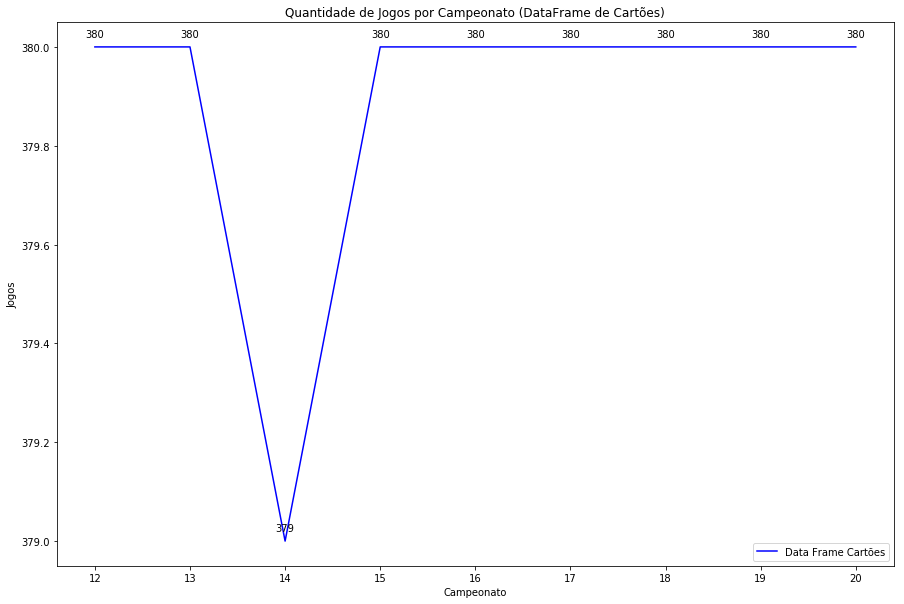

In [60]:
#Analisando o Data frame de cartões

fig,ax=plt.subplots(figsize=(15,10))
ax.set(xlabel='Campeonato', ylabel='Jogos',
       title='Quantidade de Jogos por Campeonato (DataFrame de Cartões)')


plt.plot(df_qtd_jogos_cartoes['campeonato'],df_qtd_jogos_cartoes['total'],label="Data Frame Cartões",color='blue')


for x,y in zip(df_qtd_jogos_cartoes['campeonato'],df_qtd_jogos_cartoes['total']):

    label = "{:}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.legend(loc='lower right')
plt.show()

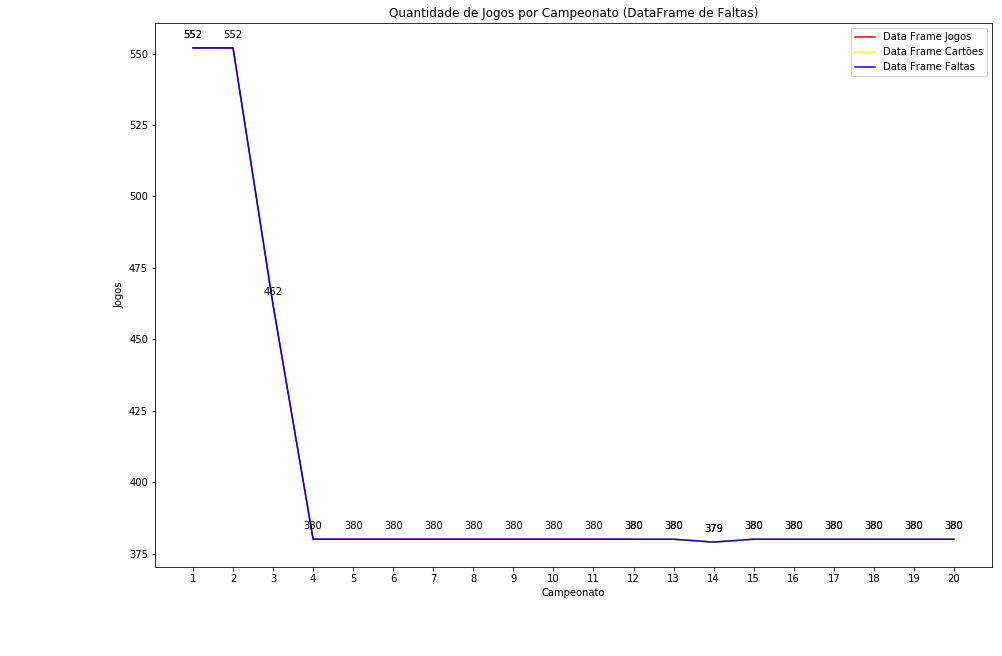

In [61]:
# Analisando os 3 data frames em conjunto

fig,ax=plt.subplots(figsize=(15,10))
ax.set(xlabel='Campeonato', ylabel='Jogos',
       title='Quantidade de Jogos por Campeonato (DataFrame de Faltas)')

plt.plot(df_quantidade_jogos['campeonato'],df_quantidade_jogos['total'],label="Data Frame Jogos",color='red')


plt.plot(df_qtd_jogos_cartoes['campeonato'],df_qtd_jogos_cartoes['total'],label="Data Frame Cartões",color='yellow')


plt.plot(df_qtd_jogos_faltas['campeonato'],df_qtd_jogos_faltas['total'],label="Data Frame Faltas",color='blue')


for x,y in zip(df_quantidade_jogos['campeonato'],df_quantidade_jogos['total']):

    label = "{:}".format(y)

    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points",
                 xytext=(0,10), 
                 ha='center') 



for x,y in zip(df_qtd_jogos_cartoes['campeonato'],df_qtd_jogos_cartoes['total']):

    label = "{:}".format(y)

    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')


for x,y in zip(df_qtd_jogos_faltas['campeonato'],df_qtd_jogos_faltas['total acumulado']):

    label = "{:}".format(y)

    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center') 

plt.legend()
plt.show()

In [62]:
#Obs.: O campeonato 14 trata-se do campeonato do ano de 2016 onde na última rodada ocorreu o w.o duplo entre a partida de
# Chapecoense x Atletico MG devido ao acidente que envolveu a delegação da Chapecoense. Portanto, o campeonato se 
#encerrou com 379 partidas e não 380 como o previsto.